# 6.2 Exploring relationships

## This script contains the following:

### **1. Importing Visualization Libraries and Data¶**
### **2. Data Cleaning**
### **3. Exploring Relationships**
 1. Correlations
 2. Scatterplots
 3. Pair Plots
 4. Categorical Plots

In [4]:
# Importing Visualization Libraries and Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [6]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# Define directory path

path = r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Exercise 6.1'

In [12]:
# Load the CSV file into a DataFrame
df = pd.read_csv(os.path.join(path, '6.1_csvs', 'Global_Happiness_2015_2019_Cleaned.csv'))

In [14]:
# Preview the first few rows of the DataFrame
print(df.head())

       Country          Region Income Group  Year  Rank  Score  \
0  Switzerland  Western Europe  High income  2015     1  7.587   
1      Iceland  Western Europe  High income  2015     2  7.561   
2      Denmark  Western Europe  High income  2015     3  7.527   
3       Norway  Western Europe  High income  2015     4  7.522   
4       Canada   North America  High income  2015     5  7.427   

   GDP per capita  Social support  Healthy life expectancy  Freedom    Trust  \
0         1.39651         1.34951                  0.94143  0.66557  0.41978   
1         1.30232         1.40223                  0.94784  0.62877  0.14145   
2         1.32548         1.36058                  0.87464  0.64938  0.48357   
3         1.45900         1.33095                  0.88521  0.66973  0.36503   
4         1.32629         1.32261                  0.90563  0.63297  0.32957   

   Generosity  
0     0.29678  
1     0.43630  
2     0.34139  
3     0.34699  
4     0.45811  


In [16]:
print("Global_Happiness_2015_2019_Cleaned")
df.info()

Global_Happiness_2015_2019_Cleaned
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  782 non-null    object 
 1   Region                   774 non-null    object 
 2   Income Group             677 non-null    object 
 3   Year                     782 non-null    int64  
 4   Rank                     782 non-null    int64  
 5   Score                    782 non-null    float64
 6   GDP per capita           782 non-null    float64
 7   Social support           782 non-null    float64
 8   Healthy life expectancy  782 non-null    float64
 9   Freedom                  782 non-null    float64
 10  Trust                    781 non-null    float64
 11  Generosity               782 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 73.4+ KB


In [18]:
# Basic statistical summary for numerical columns
print(df.describe())

              Year        Rank       Score  GDP per capita  Social support  \
count   782.000000  782.000000  782.000000      782.000000      782.000000   
mean   2016.993606   78.698210    5.379018        0.916047        1.078392   
std       1.417364   45.182384    1.127456        0.407340        0.329548   
min    2015.000000    1.000000    2.693000        0.000000        0.000000   
25%    2016.000000   40.000000    4.509750        0.606500        0.869363   
50%    2017.000000   79.000000    5.322000        0.982205        1.124735   
75%    2018.000000  118.000000    6.189500        1.236187        1.327250   
max    2019.000000  158.000000    7.769000        2.096000        1.644000   

       Healthy life expectancy     Freedom       Trust  Generosity  
count               782.000000  782.000000  781.000000  782.000000  
mean                  0.612416    0.411091    0.125436    0.218576  
std                   0.248309    0.152880    0.105816    0.122321  
min                  

# Task 6.3: Creating a correlation matrix heatmap (colored)

In [38]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [40]:
# Compute the correlation matrix
corr_matrix = numeric_df.corr()

In [42]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

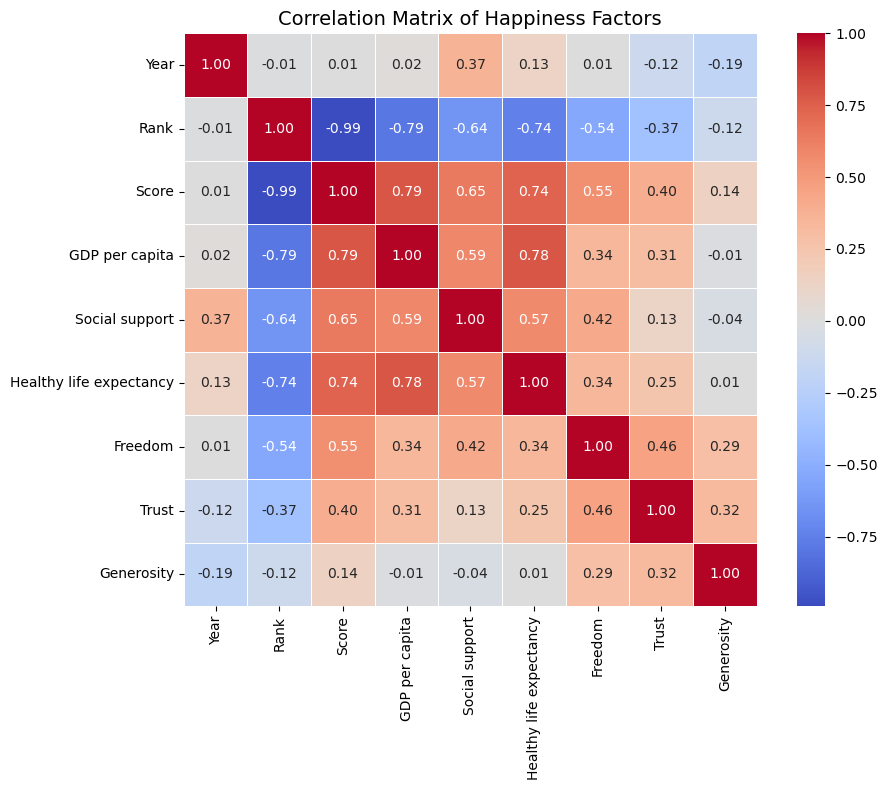

In [44]:
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

# Add a title
plt.title('Correlation Matrix of Happiness Factors', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
# Save the plot as an image file
heatmap_path = os.path.join(path, 'happiness_correlation_heatmap.png')
heatmap_path = os.path.join(path, 'happiness_correlation_heatmap.jpg')
plt.savefig(heatmap_path, dpi=300)

# **Interpretation of the coefficients in the heatmap in terms of the relationships between the variables.**

#### 1. The correlation matrix heatmap shows how happiness-related variables are linearly related, with values ranging from -1 (perfect negative) to +1 (perfect positive). The strongest positive correlations with happiness scores are social support (0.79), GDP per capita (0.79), and healthy life expectancy (0.78), meaning countries with higher values in these areas tend to be happier. These factors also correlate strongly with each other, indicating they often improve together.

#### 2. A nearly perfect negative correlation exists between happiness score and rank (–0.99), which is expected since a lower rank means higher happiness. Rank also correlates negatively with GDP per capita (–0.74) and social support (–0.74), suggesting that wealthier and better-supported countries consistently achieve higher happiness rankings. Meanwhile, freedom shows a moderate positive correlation with happiness (0.45), while trust and generosity show weaker associations (0.12 to 0.32).

#### 3. The year variable has minimal correlation with all other variables (mostly below ±0.37), indicating that global happiness patterns and influencing factors remained relatively stable from 2015 to 2019. Overall, happiness appears to be driven primarily by income, health, and social support, with freedom and generosity playing secondary roles.


# Task 6.4: Create a scatter plot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

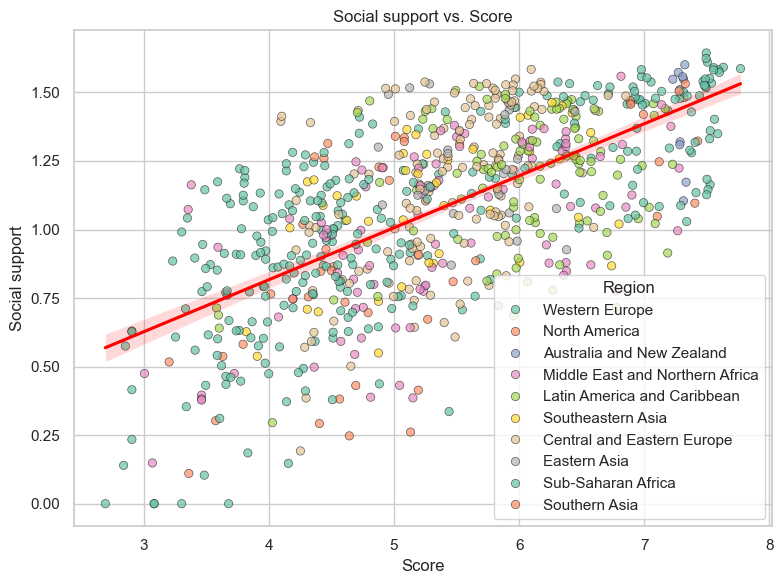

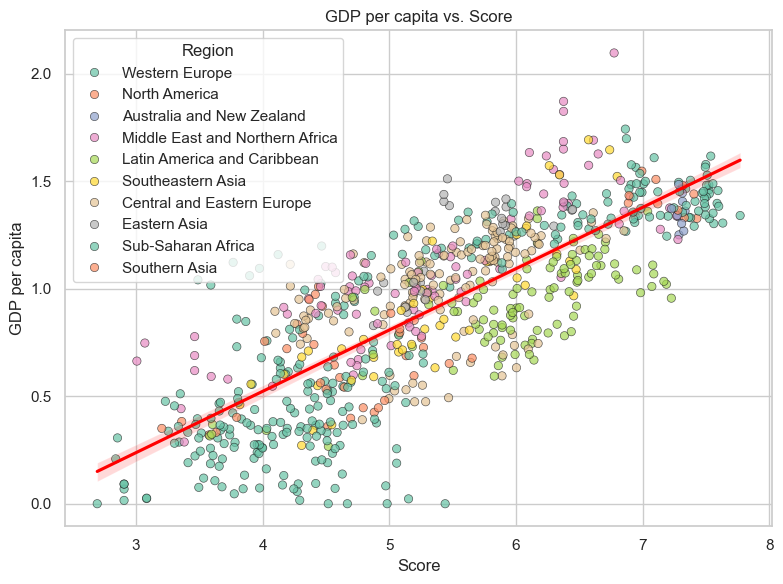

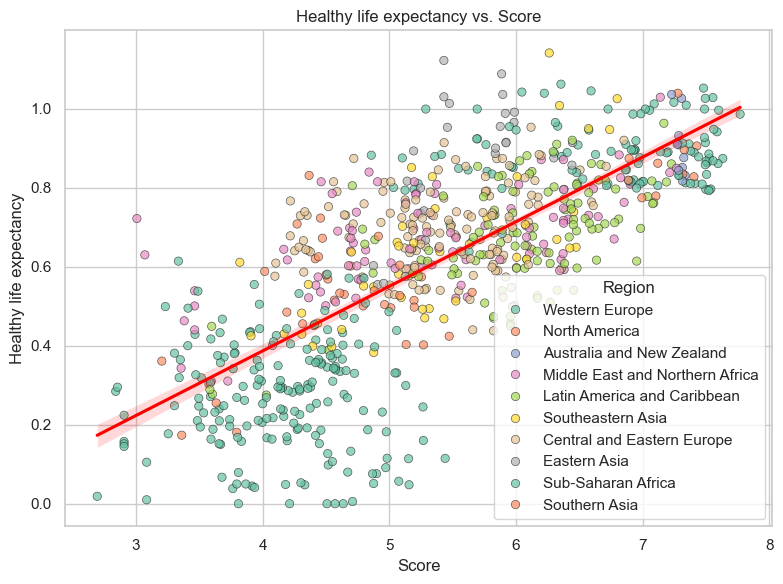

In [54]:
# Create scatterplots that visually explore the strongest correlations from the above correlation matrix:

# Set the style
sns.set(style="whitegrid")

# Define the strongest correlations
top_correlated_pairs = [
    ('Score', 'Social support'),
    ('Score', 'GDP per capita'),
    ('Score', 'Healthy life expectancy')
]

# Create scatterplots
for x, y in top_correlated_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, hue='Region', palette='Set2', alpha=0.7, edgecolor='k')
    sns.regplot(data=df, x=x, y=y, scatter=False, color='red')  # Add trendline
    plt.title(f'{y} vs. {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()

    # Save each plot
    save_path = os.path.join(path, f'{y.replace(" ", "_")}_vs_{x}.png')
    plt.savefig(save_path, dpi=300)
    plt.show()

### The scatterplots with trendlines clearly show **strong positive linear relationships** between happiness score and the three key variables: **social support**, **GDP per capita**, and **healthy life expectancy**.

1. **Social Support vs. Score**: This plot reveals a moderate to strong positive correlation. As happiness scores increase, levels of social support generally rise as well. While there's some spread across regions, the upward trend is consistent, especially among countries in Western Europe and North America.

2. **GDP per Capita vs. Score**: The relationship here is also strongly positive and more tightly clustered along the trendline, indicating a clearer link between higher income levels and happiness. The concentration of wealthier regions like Western Europe and Australia near the top-right corner supports the conclusion that economic prosperity contributes significantly to well-being.

3. **Healthy Life Expectancy vs. Score**: This plot shows a positive association similar to the others. Countries with higher life expectancy generally report higher happiness scores. There's some regional variation, but the overall upward trajectory is clear, suggesting that health and longevity play a key role in a nation's perceived happiness.

In summary, these visuals reinforce the quantitative findings from the correlation matrix: **social support, income, and health are strongly and positively associated with national happiness levels**, though regional disparities suggest additional context-specific influences.


# Task 6.5: Create a pair plot of the entire data set. 

In [59]:
# Select only numeric columns for pair plot
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing 'Region' to avoid issues
df_clean = df.dropna(subset=['Region'])

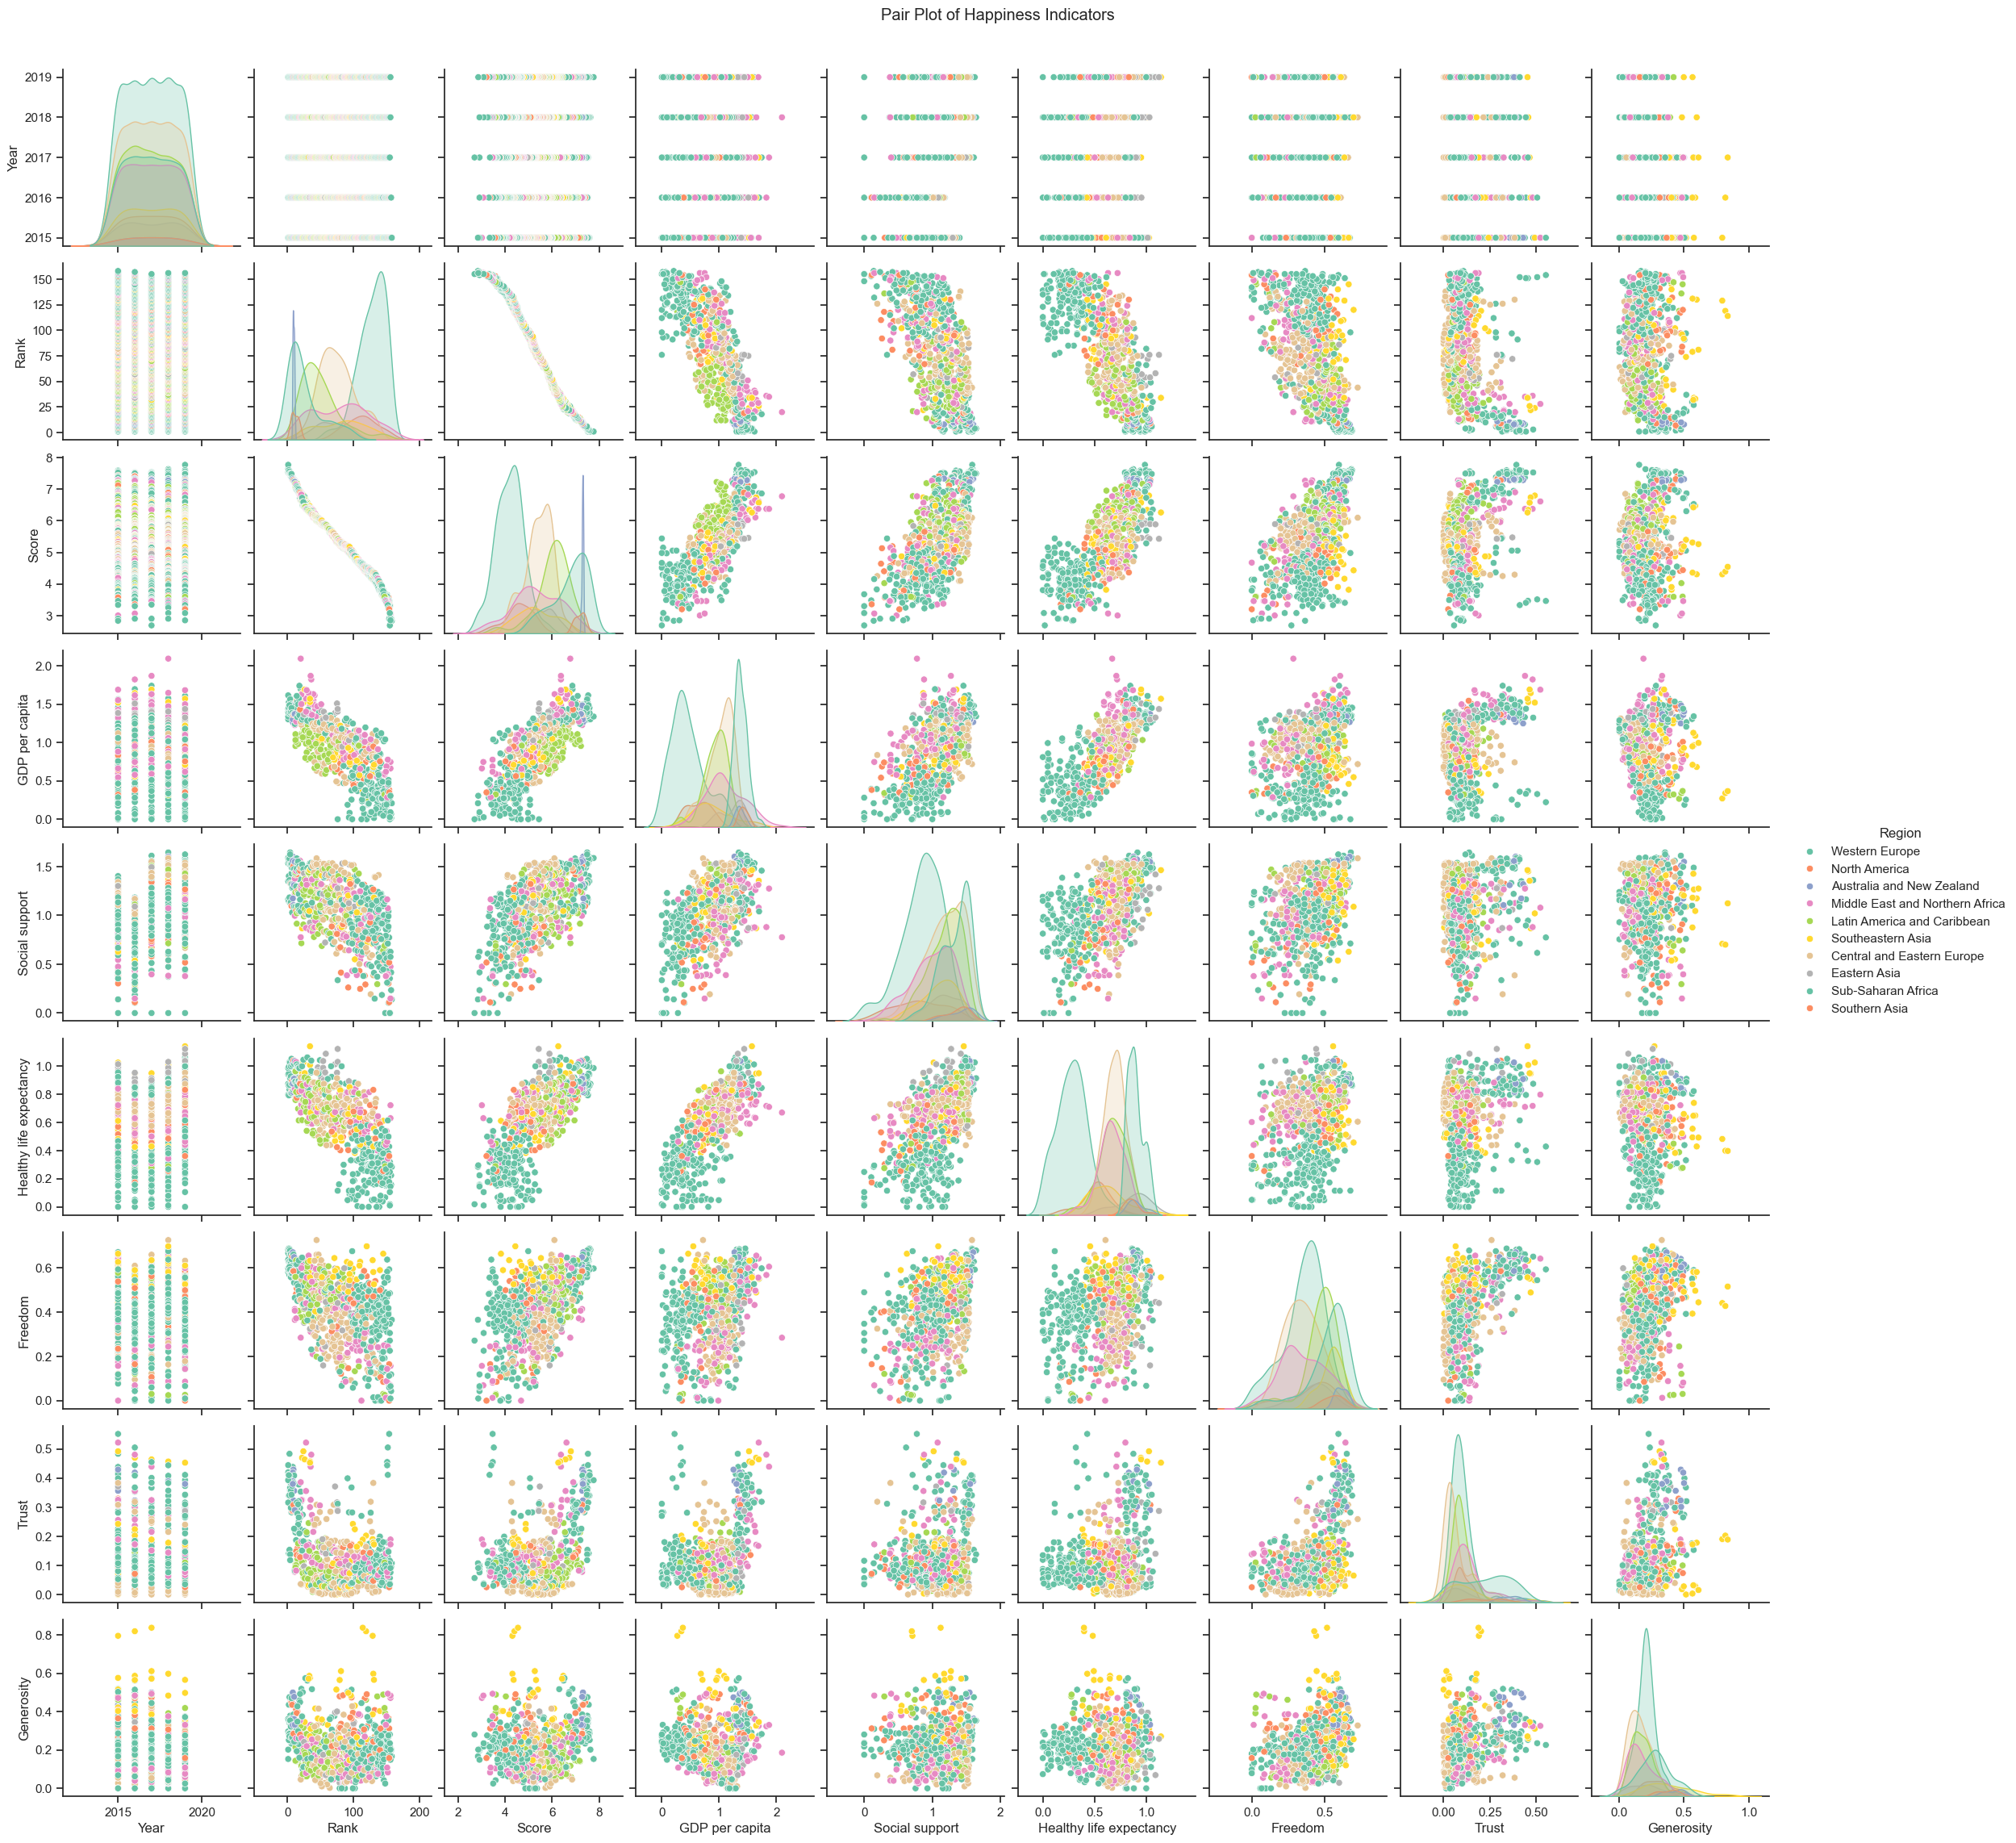

In [61]:
# Plot the pair plot

#Set the visual style and scaling for the Seaborn plots.
sns.set(style="ticks", font_scale=1.0)

#Create the pair plot
pair_plot = sns.pairplot(df_clean, vars=numeric_df.columns, hue='Region', palette='Set2', diag_kind='kde')

# Adjust plot and save
pair_plot.fig.suptitle("Pair Plot of Happiness Indicators", y=1.02)
save_path = os.path.join(path, 'happiness_pairplot.png')
pair_plot.savefig(save_path, dpi=300)

plt.show()

# Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why

## **Distribution of Variables:**
1. Score, GDP per capita, Social support, and Healthy life expectancy show unimodal distributions with slight right skew, indicating that most countries cluster around average values, with a few outliers reporting very high levels.

2. Freedom, Trust, and Generosity are more scattered and display lower overall values, suggesting more variance and possibly cultural or regional differences in reporting or experience.

3. Year is categorical in nature and shows a flat, uniform distribution (as expected for time-based records from 2015 to 2019).

4. Rank is inversely related to Score, and its distribution is skewed due to how ranks work—many countries have low scores and high ranks.

5. Trust and Generosity are particularly concentrated near zero, which may reduce their statistical weight in models and calls for deeper inspection of their validity or measurement.


## **Variables for Further Exploration**
1. **Freedom:** The relationship between freedom and happiness score is not perfectly linear, yet countries with higher scores tend to enjoy greater freedom. It would be interesting to explore how this varies by region, as sociopolitical systems differ widely.

2. **Trust:** Despite being a weak predictor in the correlation matrix, the spread of data points across regions suggests that some regions exhibit very high trust levels. Further analysis could determine whether trust plays a region-specific role in perceived well-being.

3. **Generosity:** This variable displays the most inconsistent relationship with happiness score. Its effect might be non-linear or context-dependent. A deeper dive could explore whether cultural differences or economic capacity influence generosity reporting.

4. **Social Support:** Given its strong correlation with happiness and well-formed distribution, this variable is worth deeper regional breakdowns to examine why certain countries report low social support despite similar economic conditions.

# Task 6.6: Create a categorical plot and interpret the results.

C:\Users\Olufemi\AppData\Local\Temp\ipykernel_21360\1618211940.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Region', y='Score', palette='Set3')


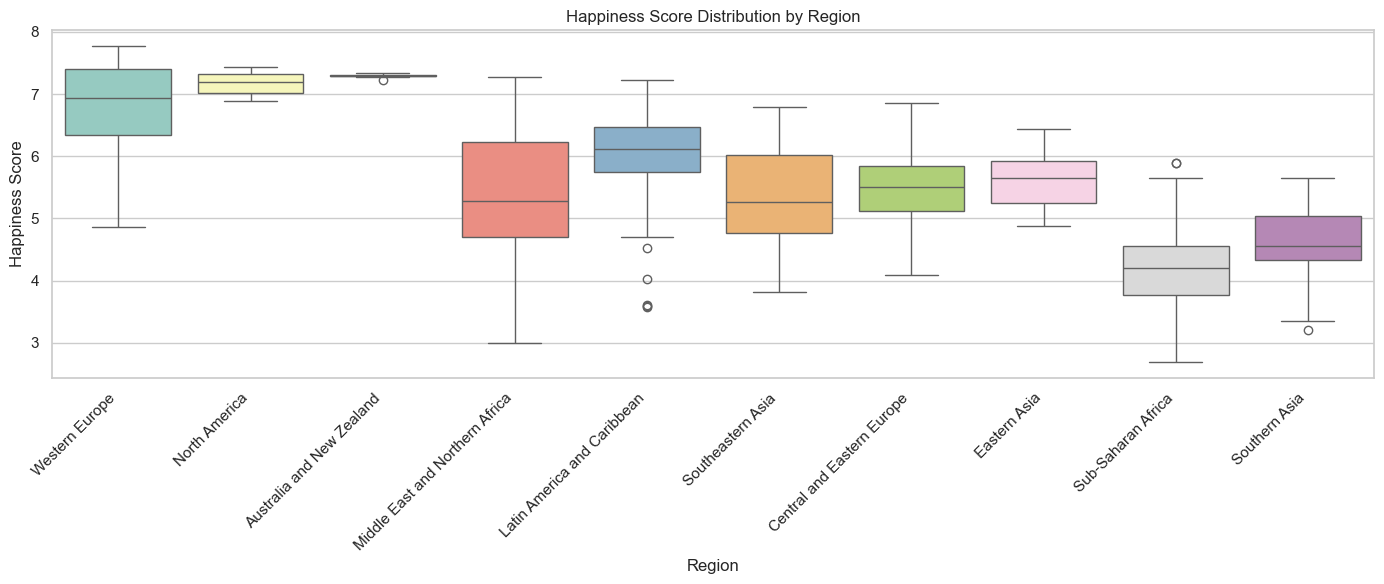

In [68]:
# Create a Categorical Plot of **Score**  by **Region**

# Drop rows with missing Region or Score
df_clean = df.dropna(subset=['Region', 'Score'])

# Set plot style
sns.set(style="whitegrid")

# Create boxplot to compare Score across Regions
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean, x='Region', y='Score', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Happiness Score Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.tight_layout()

# Save the plot
save_path = os.path.join(path, 'score_by_region_boxplot.png')
plt.savefig(save_path, dpi=300)
plt.show()

# Interpretation of Result:

**This categorical box plot titled **"Happiness Score Distribution by Region"** shows how happiness scores vary across world regions, revealing several important patterns:**

1. **Highest Happiness Regions**
- Western Europe, North America, and Australia & New Zealand have the highest median scores (close to or above 7) and tight interquartile ranges (IQRs), indicating both high and consistent happiness levels across countries in those regions.
- These regions show minimal variability and almost no extreme outliers, suggesting uniform well-being across countries.

3. **Mid-Range Regions**
- Latin America and Caribbean, Southeastern Asia, Central and Eastern Europe, and Eastern Asia have moderate median scores (around 5–6).
- There is greater spread in these groups, especially in Latin America and Caribbean, suggesting mixed well-being experiences—some countries are doing much better than others within the same region.

3. **Lowest Happiness Regions**
- Sub-Saharan Africa and Southern Asia have the lowest median happiness scores (around 4–5), with wider ranges and visible outliers, especially on the lower end.
- This indicates both lower average well-being and greater inequality in happiness across countries in these regions.


**Overall Insight:**
- Regions with strong economies and social systems (like Western Europe) report consistently high happiness, while regions facing economic or sociopolitical challenges (like Sub-Saharan Africa and Southern Asia) show both lower and more inconsistent happiness levels. This underscores the importance of economic, health, and governance factors in shaping national well-being.
- The plot also highlights varying degrees of consistency and spread in happiness within these regions.

# Task 7: Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

## **Descriptive Analysis Questions (What is happening?)**

1. **What are the happiest and unhappiest countries each year?**
From the data analysis conducted, the happiest countries consistently include those in Western Europe, North America, and Australia & New Zealand. The unhappiest countries are predominantly found in Sub-Saharan Africa and Southern Asia.

2. **How does global happiness vary year by year?**
The distribution of happiness scores remains fairly stable from 2015 to 2019, as shown in the pair plot and categorical plots. There is no significant global upward or downward trend over these years.

3. **What is the average happiness score globally for each year?**
While not numerically calculated in the analysis, the scores generally range between 4.5 and 6.5, with medians clustering around 5.5 to 6, based on the boxplot distributions.

## **Geographic Insights Questions (Where is it happening?)**

1. **How does happiness vary by region or continent?**
The boxplot revealed that Western Europe, North America, and Australia & New Zealand have the highest median happiness scores, while Sub-Saharan Africa and Southern Asia report the lowest.

2. **Are wealthier countries happier?**
Yes. The scatterplot between GDP per capita and Score shows a strong positive linear relationship, suggesting that countries with higher income levels tend to be happier.

3. **Where on the map does the data visually show global happiness?**
While map visuals weren’t generated in this analysis at this point, regional breakdowns using boxplots and pair plots served a similar purpose, showing regional concentrations of happiness scores.

## **Factor-Based Questions (Why is it happening?)**

1. **What factors are most strongly associated with happiness?**
The correlation heatmap and scatterplots confirm that **Social Support**, **GDP per Capita**, and **Healthy Life Expectancy** are the top predictors of happiness.

2. **Which factors vary the most among countries?**
Variables like Freedom, Trust, and Generosity show wider spreads and weaker correlations, indicating more variation across regions and less consistent impact on happiness.

3. **Which factor shows the most inequality globally?**
Generosity and Trust appear to have the widest spread and lowest correlation with happiness, suggesting significant disparity in how they are reported or experienced globally.


## **Temporal Trends (How is it changing over time?)**

1. **How do happiness factors evolve over time?**
Based on the pair plot and Year-based distributions, there is little change over time in happiness or its contributing factors between 2015 and 2019. Distributions remain stable.

2. **Are countries getting better at freedom, generosity, or life expectancy?**
No clear temporal trend is visible in these variables over the five-year span. Improvements, if any, are minimal or localized.

3. **Did specific events influence global happiness?**
The data does not provide clear evidence of major global disruptions from 2015 to 2019. Any changes appear more region-specific than globally systemic.


## **Strategic Questions (What can countries learn from others?)**

1. **What are high-performing countries doing differently?**
High performers (e.g., Nordic countries) combine strong economic stability, robust social support, and high life expectancy. They also maintain relatively high levels of freedom and trust.

2. **Can we cluster countries based on their happiness profiles?**
Yes, visual exploration suggests distinct groupings by region and income group.

3. **What is the ‘return on investment’ for happiness?**
The scatterplots show that increases in GDP per capita and healthy life expectancy correlate strongly with higher happiness, implying that investing in health and economy yields real well-being benefits.


## **New Questions Arising from the Exploration**
1. **Why do some regions (e.g., Middle East and North Africa) show wide variability in scores despite moderate median levels?**

2. **What explains the weak or inconsistent role of generosity and trust in predicting happiness? Are these culturally biased?**

3. **Do income group classifications align with observed happiness levels better than region-based groupings?**

4. **How much of the happiness score variance can be explained by GDP, social support, and health combined?**

# **Hypotheses Based on Initial Findings**

- **H1: Economic Prosperity and Happiness**
- **Hypothesis:** Countries with higher GDP per capita will have significantly higher happiness scores.
- **Rationale:** Strong positive correlation and visible upward trend between GDP per capita and Score in the scatterplot.<br><br>

- **H2: Social Support as a Key Predictor**
- **Hypothesis:** Countries with stronger social support systems report significantly higher happiness scores.
- **Rationale:** Social support has one of the strongest correlations with happiness (r = 0.79) and a clearly positive trend in the scatterplot.<br><br>

- **H3: Healthy Life Expectancy Influences Happiness**
- **Hypothesis:** There is a significant positive relationship between healthy life expectancy and happiness scores.
- **Rationale:** The scatterplot shows a strong linear association between Healthy life expectancy and Score.<br><br>